In [71]:
import numpy as np
import pandas as pd

In [72]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

In [73]:
df.head()
# df = df.drop('Unnamed: 0',axis = 1)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [124]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [126]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


yoe = 1.2-10.6
salary = 37732-122392

In [127]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [128]:
X,Y

(    YearsExperience
 0               1.2
 1               1.4
 2               1.6
 3               2.1
 4               2.3
 5               3.0
 6               3.1
 7               3.3
 8               3.3
 9               3.8
 10              4.0
 11              4.1
 12              4.1
 13              4.2
 14              4.6
 15              5.0
 16              5.2
 17              5.4
 18              6.0
 19              6.1
 20              6.9
 21              7.2
 22              8.0
 23              8.3
 24              8.8
 25              9.1
 26              9.6
 27              9.7
 28             10.4
 29             10.6,
 0      39344.0
 1      46206.0
 2      37732.0
 3      43526.0
 4      39892.0
 5      56643.0
 6      60151.0
 7      54446.0
 8      64446.0
 9      57190.0
 10     63219.0
 11     55795.0
 12     56958.0
 13     57082.0
 14     61112.0
 15     67939.0
 16     66030.0
 17     83089.0
 18     81364.0
 19     93941.0
 20     91739.0
 21     9827

# split dataset into train and test data

In [129]:
from sklearn.model_selection import train_test_split as tts

In [130]:
x_train,x_test,y_train,y_test = tts(X,Y,test_size = .2,random_state = 42)

# model building

In [131]:
from sklearn.neighbors import KNeighborsRegressor

In [132]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor

KNeighborsRegressor()

In [133]:
regressor.fit(x_train,y_train)

KNeighborsRegressor()

# Prediction

In [134]:
y_pred = regressor.predict(x_test)

In [135]:
pd.DataFrame({'Actual':y_test, 'Predicted':regressor.predict(x_test)})

,Actual,Predicted
27,112636.0,115250.0
15,67939.0,59395.4
23,113813.0,106312.4
17,83089.0,71905.8
8,64446.0,58050.8
9,57190.0,57500.0


# model performance

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [137]:
mae = mean_absolute_error(y_test, y_pred)
mae

6091.099999999999

In [138]:
mse = mean_squared_error(y_test, y_pred)
mse

50357290.43333333

In [139]:
rmse = np.sqrt(mse)
rmse

7096.287087860336

# Visualization

In [140]:
import matplotlib.pyplot as plt

In [143]:
min(x_test.values), max(x_test.values)
# x_test

(array([3.3]), array([9.7]))

In [145]:
x_range = np.linspace(min(x_test.values), max(x_test.values), 6).reshape(-1, 1)

In [150]:
x_test

,YearsExperience
27,9.7
15,5.0
23,8.3
17,5.4
8,3.3
9,3.8


/tmp/ipykernel_32/2993135511.py:6: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test.values, y_test, color='y', marker='x',edgecolors = 'red', s=100, label='Actual Value')


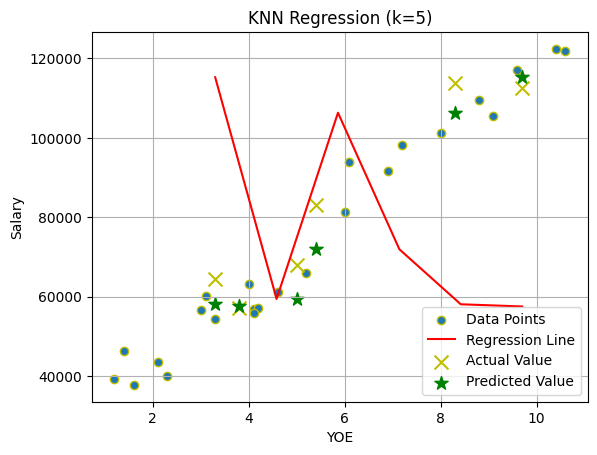

In [163]:
# x_range = np.linspace(min(x_test.values), max(x_test.values), 6).reshape(-1, 1) #create an evenly spaced sequence in a specified interval.
# plt.scatter(x_train.values, y_train.values, label='Data Points')
plt.scatter(x_train.values, y_train.values, label='Data Points',edgecolors = 'y')#80% data
plt.plot(x_range, y_pred, color='red', label='Regression Line')

plt.scatter(x_test.values, y_test, color='y', marker='x',edgecolors = 'red', s=100, label='Actual Value')
plt.scatter(x_test.values, y_pred, color='green', marker='*', s=100, label='Predicted Value')
plt.xlabel('YOE')
plt.ylabel('Salary')
plt.legend()
plt.title('KNN Regression (k=5)')


plt.grid()

plt.show()

In [99]:
# min([17,14,164])

In [156]:
# # x_range = np.linspace(min(x_test.values), max(x_test.values), 6).reshape(-1, 1)

# plt.scatter(x_train.values, y_train.values, label='Data Points')
# plt.plot(x_range, y_pred, color='red', label='Regression Line')
# plt.scatter(x_test.values, y_pred, color='green', marker='x', s=100, label='Predicted Value')
# plt.xlabel('Feature')
# plt.ylabel('Target')
# plt.legend()
# plt.title('KNN Regression (k=5)')
# plt.show()

In [155]:
# plt.figure(figsize=(10, 6))
# plt.scatter(x_train, y_train, color='darkorange', label='data')
# plt.plot(x_test, y_pred, color='navy', lw=2, label='prediction')
# plt.title("K-Nearest Neighbors Regressor")
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.legend()
# plt.show()

In [158]:
df


,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0
